# Email Spam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ANLP-Y4T3/email_spam.csv")
data.head(5)


,email,label
0,"Subject: what up , , your cam babe what are yo...",spam
1,Subject: want to make more money ? order confi...,spam
2,Subject: food for thoughts [ join now - take a...,spam
3,Subject: your pharmacy ta would you want cheap...,spam
4,Subject: bigger breast just from a pill image ...,spam


In [ ]:
data.columns

Index(['email', 'label'], dtype='object')

In [ ]:
#checking distribution of the dataset
data.groupby('label').count()


,email
label,
ham,8336
spam,9494


In [ ]:
#renaming columns
data.columns = ['text', 'label']
# creating dummy variables for spam and ham
y=pd.get_dummies(data['label']) #check what get_dummies function does
y=y.iloc[:,1].values
data.head(10)

,text,label
0,"Subject: what up , , your cam babe what are yo...",spam
1,Subject: want to make more money ? order confi...,spam
2,Subject: food for thoughts [ join now - take a...,spam
3,Subject: your pharmacy ta would you want cheap...,spam
4,Subject: bigger breast just from a pill image ...,spam
5,Subject: cant find you on msn . . . but ride i...,spam
6,Subject: majestic rx - - - - 86738490004042205...,spam
7,Subject: quick way to buy soft - ware variety ...,spam
8,"Subject: some advice to him mon , 27 dec 2004 ...",spam
9,Subject: software at incredibly low prices ( 8...,spam


In [ ]:
print(data['label'].value_counts().index)

Index(['spam', 'ham'], dtype='object', name='label')


In [ ]:
print(data)

                                                    text label
0      Subject: what up , , your cam babe what are yo...  spam
1      Subject: want to make more money ? order confi...  spam
2      Subject: food for thoughts [ join now - take a...  spam
3      Subject: your pharmacy ta would you want cheap...  spam
4      Subject: bigger breast just from a pill image ...  spam
...                                                  ...   ...
17825  Subject: re : your consent needed from : the d...  spam
17826  Subject: see our page , save thousands on m e ...  spam
17827  Subject: here you go timed aaron offload mispl...  spam
17828  Subject: extra time did you ejaculate before o...  spam
17829  Subject: one more time check , rock , money . ...  spam

[17830 rows x 2 columns]


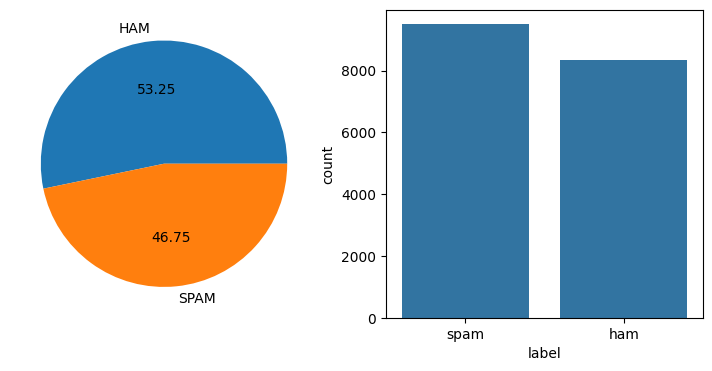

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualization of distribution of classes
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.pie(data['label'].value_counts(),labels=['HAM','SPAM'],autopct="%0.2f")
plt.subplot(1,2,2)
sns.barplot(x=data['label'].value_counts().index,y=data['label'].value_counts())#,data=data)
plt.show()


##Text Processing

In [ ]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stopwords = nltk.corpus.stopwords.words('english')
import re

#cleaning dataset
tk = TweetTokenizer() #creating object for tokenizer
stemmer = SnowballStemmer('english') #creating object for stemmer
corpus = []

for i in range(0,len(data)): #len(data) indicates no. of rows or lines to process
 message = re.sub('[^a-zA-Z]', ' ', data['text'][i]) #replace any value other than a-z or A-Z with space
 message = re.sub("Subject", "", message)
 message = message.lower() #lowercase all words in a row
 message =tk.tokenize(message)
 message = [stemmer.stem(word) for word in message if not\
 word in set(stopwords)] #stemming if word not present in stop words
 message = ' '.join(message) #joining list of words to form a sentence
 corpus.append(message)

In [ ]:
#creating cleaned dataframe containing text and labels for visualisation purpose
df = pd.DataFrame({'text':corpus})
print (df)

                                                    text
0      cam babe look look companion friendship love d...
1      want make money order confirm order ship janua...
2           food thought join take free tour click remov
3      pharmaci ta would want cheap perscript http ww...
4      bigger breast pill imag load cli k info ship s...
...                                                  ...
17825  consent need desk honor chairman local everyth...
17826  see page save thousand e help get e cheap zv s...
17827  go time aaron offload misplac shove withstand ...
17828  extra time ejacul within minut penetr must ord...
17829  one time check rock money paper space winter u...

[17830 rows x 1 columns]


In [ ]:
data= df.join(data["label"], how="outer")
print(data)

                                                    text label
0      cam babe look look companion friendship love d...  spam
1      want make money order confirm order ship janua...  spam
2           food thought join take free tour click remov  spam
3      pharmaci ta would want cheap perscript http ww...  spam
4      bigger breast pill imag load cli k info ship s...  spam
...                                                  ...   ...
17825  consent need desk honor chairman local everyth...  spam
17826  see page save thousand e help get e cheap zv s...  spam
17827  go time aaron offload misplac shove withstand ...  spam
17828  extra time ejacul within minut penetr must ord...  spam
17829  one time check rock money paper space winter u...  spam

[17830 rows x 2 columns]


##Data Visualization

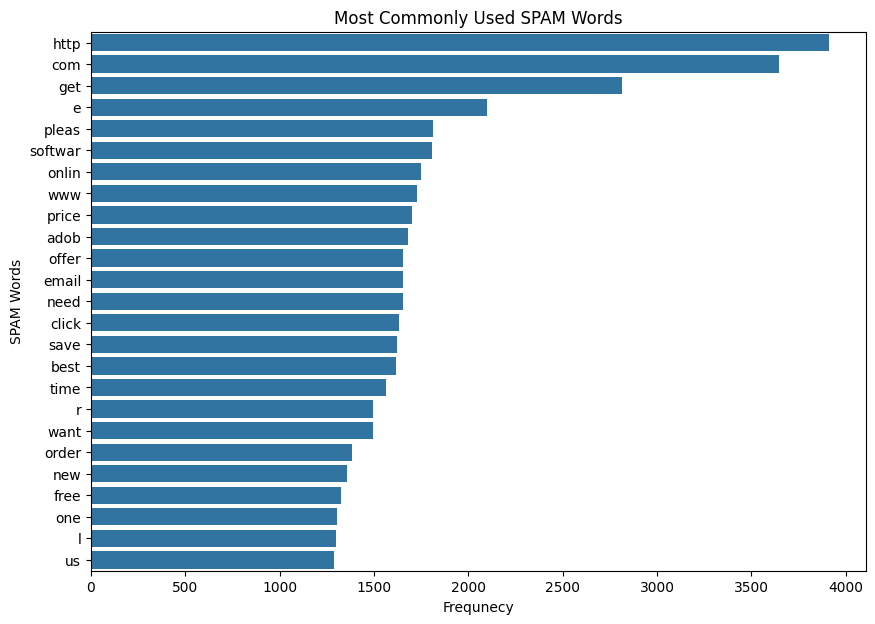

In [ ]:
#Distribution of most commonly used SPAM words
#create spam corpus which will holds all Spam words
from collections import Counter
spam_corpus = []
for msg in data[data['label'] == "spam"]['text'].tolist():
 for word in msg.split():
  spam_corpus.append(word)

#plot the figure
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used SPAM Words")
plt.xlabel("Frequnecy")
plt.ylabel("SPAM Words")
plt.show()

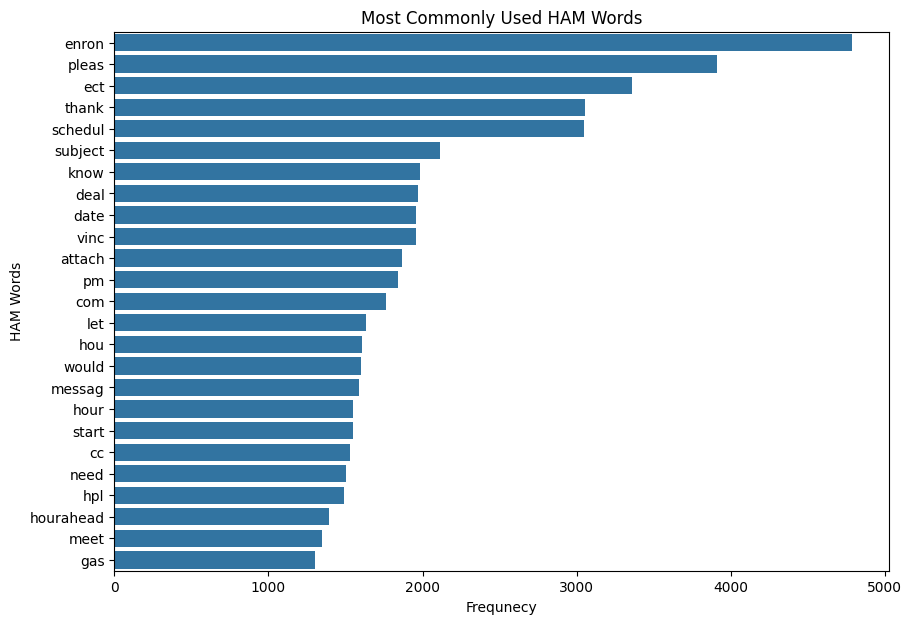

In [ ]:
#Distribution of most commonly used HAM words
#create spam corpus which will holds all ham words
ham_corpus = []
for msg in data[data['label'] == "ham"]['text'].tolist():
 for word in msg.split():
  ham_corpus.append(word)
#plot the figure
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(ham_corpus).most_common(25))[0],x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used HAM Words")
plt.xlabel("Frequnecy")
plt.ylabel("HAM Words")
plt.show()

##Classification

In [ ]:
#Neural Networks
!pip install keras


In [ ]:
# Import the tools we will need from keras and sklearn
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout, Input
from sklearn.model_selection import train_test_split

In [ ]:
words=[]
for sent in corpus:
 sent_token =tk.tokenize(sent)
 words.append(sent_token)
X_train, X_test, y_train, y_test = train_test_split(words, y, test_size = 0.20, random_state = 0)

In [ ]:
print(len(words)) # prints out the number of message arrays (each containing the cleaned up words in the message)

17830


In [ ]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# transform the text messages to training and test vectors
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 100)
X_test_seq_padded = pad_sequences(X_test_seq, 100)

In [ ]:
X_train_seq_padded

array([[    0,     0,     0, ...,    33,    54,   105],
       [    0,     0,     0, ...,  1993,   111,    20],
       [    0,     0,     0, ...,  3127,     5,  3043],
       ...,
       [    0,     0,     0, ..., 48107,     2, 13163],
       [    0,     0,     0, ..., 19977, 48109,  1157],
       [    0,     0,     0, ..., 15201,     5,   497]], dtype=int32)

In [ ]:
X_test_seq_padded

array([[   0,    0,    0, ...,  124,  107,  234],
       [   0,    0,    0, ...,  125,  763,  125],
       [   0,    0,    0, ..., 6963,  243,  460],
       ...,
       [   0,    0,    0, ...,   46,  169,   94],
       [   0,    0,    0, ...,  146, 5873,  714],
       [   0,    0,    0, ..., 3586, 1686,  932]], dtype=int32)

In [ ]:
#create a simple 1 or 2 layer neural network with a given number of units in each layer
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [ ]:
# define the model
model = Sequential()
model.add(InputLayer(input_shape=(100,))) #changed shape to input_shape
model.add(Dense(2000, activation='sigmoid'))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2000)              202000    
                                                                 
 dense_11 (Dense)            (None, 200)               400200    
                                                                 
 dense_12 (Dense)            (None, 1)                 201       
                                                                 
Total params: 602401 (2.30 MB)
Trainable params: 602401 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train_seq_padded, y_train,
 epochs=40, batch_size=32, verbose=1, validation_split=0.2)


In [ ]:
# Test the modelon the test data after training
test_results = model.evaluate(X_test_seq_padded, y_test, verbose=1)
print(f'Test results - Accuracy: {test_results[1]*100: .2f}%')

112/112 [==============================] - 0s 3ms/step - loss: 0.6459 - accuracy: 0.6223
Test results - Accuracy:  62.23%


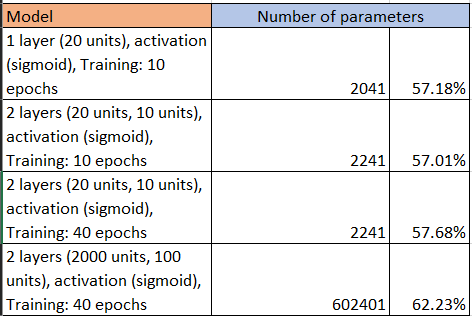

##multinomial

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train_seq_padded, y_train)

MultinomialNB()

In [ ]:
# Test the model after training
test_results = classifier.predict(X_test_seq_padded)
accuracy = metrics.accuracy_score(y_test, test_results)
print(f' {accuracy *100: 2f}%')

  53.168817%


#Testing improvements for model

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators= 100)
model.fit(X_train_seq_padded, y_train)

RandomForestClassifier()

In [ ]:

scores = cross_validate(model, X_train_seq_padded, y_train, cv=10, scoring=['accuracy','precision', 'recall', 'f1_macro'])

accuracy_2 = scores.get('test_accuracy').mean()
precision_2 = scores.get('test_precision').mean()
recall_2 = scores.get('test_recall').mean()
f1_2 = scores.get('test_f1_macro').mean()

print("Accuracy:", accuracy_2,
      "\nPrecision:",precision_2,
      "\nRecall:", recall_2,
      "\nF1 Score:", f1_2)

Accuracy: 0.8468170457348807 
Precision: 0.8559887488105369 
Recall: 0.8553315440369602 
F1 Score: 0.8462324724447475
